In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [2]:
df1 = pd.read_csv('../../data/ml-latest-small/tags.csv')
df1.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [3]:
df1 = df1.drop(columns=['timestamp'],  axis=1)
df1

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
...,...,...,...
3678,606,7382,for katie
3679,606,7936,austere
3680,610,3265,gun fu
3681,610,3265,heroic bloodshed


In [4]:
df2 = pd.read_csv('../../data/ml-latest-small/movies.csv')
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df3 = pd.read_csv('../../data/ml-latest-small/ratings.csv')
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df3 = df3.drop(columns=['timestamp'],  axis=1)
df3

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [7]:
df4 = pd.read_csv('../../data/ml-latest-small/links.csv')
df4

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [8]:
df = df2.merge(df3,on='movieId')
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [9]:
df = df.merge(df4, on='movieId')
df

,movieId,title,genres,userId,rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,114709,862.0
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,5476944,432131.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,5914996,445030.0
100833,193585,Flint (2017),Drama,184,3.5,6397426,479308.0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,8391976,483455.0


## Splitting the genres

In [10]:
df['new_genres'] = df['genres'].str.split('|', 10)

In [11]:
df = df.explode('new_genres')

In [12]:
df = df.drop(columns=['genres'], axis=1)

In [13]:
df

,movieId,title,userId,rating,imdbId,tmdbId,new_genres
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure
0,1,Toy Story (1995),1,4.0,114709,862.0,Animation
0,1,Toy Story (1995),1,4.0,114709,862.0,Children
0,1,Toy Story (1995),1,4.0,114709,862.0,Comedy
0,1,Toy Story (1995),1,4.0,114709,862.0,Fantasy
...,...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),184,3.5,5914996,445030.0,Fantasy
100833,193585,Flint (2017),184,3.5,6397426,479308.0,Drama
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,8391976,483455.0,Action
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,8391976,483455.0,Animation


In [14]:
df = df.merge(df1,on='movieId')
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [15]:
#df = df.set_index('movieId')

In [16]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [17]:
tag_sorted = df['tag'].value_counts( ascending=False).head(15)
tag_sorted

thought-provoking    9736
Disney               8432
sci-fi               8154
twist ending         7423
atmospheric          7173
dark comedy          6969
superhero            6255
psychology           6048
suspense             5897
classic              5306
time travel          5287
action               5176
great soundtrack     5162
imdb top 250         5077
surreal              5068
Name: tag, dtype: int64

In [18]:
df.isna().sum()

movieId       0
title         0
userId_x      0
rating        0
imdbId        0
tmdbId        0
new_genres    0
userId_y      0
tag           0
dtype: int64

In [19]:
movies = pd.read_csv("../../data/ml-latest-small/movies.csv")
ratings = pd.read_csv("../../data/ml-latest-small/ratings.csv")

In [20]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

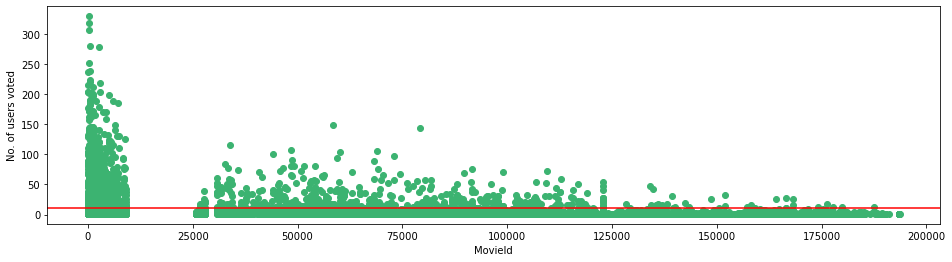

In [25]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [26]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]


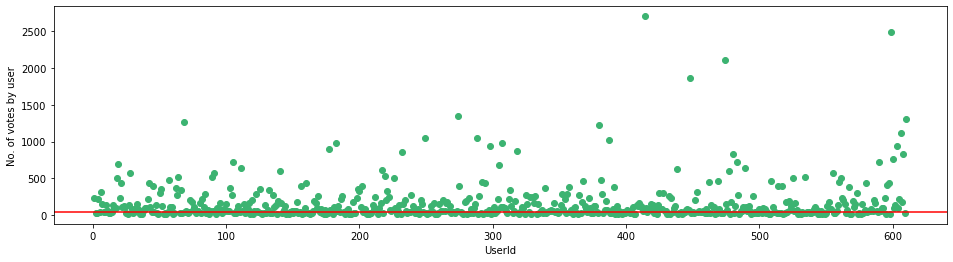

In [27]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [28]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [30]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [31]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [32]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [33]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [34]:
get_movie_recommendation('Harry Potter')

,Title,Distance
1,"Lord of the Rings: The Two Towers, The (2002)",0.391128
2,"Incredibles, The (2004)",0.386104
3,Spider-Man (2002),0.379973
4,Star Wars: Episode II - Attack of the Clones (...,0.377116
5,Pirates of the Caribbean: The Curse of the Bla...,0.367811
6,"Monsters, Inc. (2001)",0.363530
7,Shrek (2001),0.342930
8,Harry Potter and the Goblet of Fire (2005),0.284509
9,Harry Potter and the Prisoner of Azkaban (2004),0.271120
10,Harry Potter and the Chamber of Secrets (2002),0.196221


In [35]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [36]:
get_movie_recommendation('Dracula: Dead and Loving It')

,Title,Distance
1,Homeward Bound II: Lost in San Francisco (1996),0.595340
2,Barb Wire (1996),0.594520
3,Jack (1996),0.592857
4,Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001),0.588566
5,"6th Day, The (2000)",0.588331
6,Volcano (1997),0.573785
7,Anaconda (1997),0.562807
8,Tales from the Crypt Presents: Bordello of Blo...,0.559115
9,Small Soldiers (1998),0.555861
10,Sudden Death (1995),0.513191


In [37]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
# It is to specify how to read the data frame.
reader = Reader(rating_scale=(1,5))
# create the traindata from the data frame
train_data_mf = Dataset.load_from_df(df[['userId_y', 'movieId', 'rating']], reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
trainset = train_data_mf.build_full_trainset()
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [44]:

#Import the data
movie_titles_data = pd.read_csv('../../data/ml-latest-small/movies.csv')
raw_data = pd.read_csv('../../data/ml-latest-small/ratings.csv')

In [45]:

#Merge our two data sources
merged_data = pd.merge(raw_data, movie_titles_data, on='movieId')
merged_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [46]:
#Calculate aggregate data
merged_data.groupby('title')['rating'].mean().sort_values(ascending = False)
merged_data.groupby('title')['rating'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [47]:
#Create a DataFrame and add the number of ratings to is using a count method
ratings_data = pd.DataFrame(merged_data.groupby('title')['rating'].mean())
ratings_data['# of ratings'] = merged_data.groupby('title')['rating'].count()

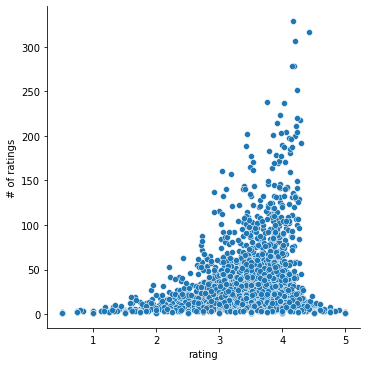

In [48]:
sns.relplot(x='rating' , y='# of ratings' , data=ratings_data)

In [49]:
#Create the ratings matrix and get user ratings for 'Heat (1995)' and `Toy Story (1995)`
ratings_matrix = merged_data.pivot_table(index='userId',columns='title',values='rating')
heat_user_ratings = ratings_matrix['Heat (1995)']
toy_story_user_ratings = ratings_matrix['Toy Story (1995)']
ratings_matrix.corrwith(toy_story_user_ratings)['Heat (1995)']

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0.10646484013036762

In [50]:

#Calculate correlations and source recommendations
correlation_with_heat = pd.DataFrame(ratings_matrix.corrwith(heat_user_ratings))
correlation_with_heat.dropna().sort_values(0, ascending = False).head(15)

,0
title,
Another 48 Hrs. (1990),1.0
Ghosts of Mississippi (1996),1.0
Escape to Witch Mountain (1975),1.0
Andre (1994),1.0
Bread and Tulips (Pane e tulipani) (2000),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Brassed Off (1996),1.0
Police Story (Ging chaat goo si) (1985),1.0
Music of the Heart (1999),1.0


In [51]:
#Add the number of ratings and rename columns
correlation_with_heat = correlation_with_heat.join(ratings_data['# of ratings'])
correlation_with_heat.columns = ['Corr. With Heat Ratings', '# of Ratings']
correlation_with_heat.index.names = ['Movie Title']

In [52]:
#Get new recommendations from movies that have more than 50 ratings
correlation_with_heat[correlation_with_heat['# of Ratings'] > 50].sort_values('Corr. With Heat Ratings', ascending = False).head(10)

,Corr. With Heat Ratings,# of Ratings
Movie Title,,
Heat (1995),1.000000,102
Philadelphia (1993),0.686060,66
Slumdog Millionaire (2008),0.662325,71
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.651800,133
"Bourne Ultimatum, The (2007)",0.611546,81
Aliens (1986),0.597448,126
I Am Legend (2007),0.574709,62
Inception (2010),0.565437,143
Army of Darkness (1993),0.550348,51


In [53]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split #must use surprise

In [54]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [55]:

# for Surprise, we only need three columns from the dataset
data = df[['userId_x', 'movieId', 'rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader) #loads Pandas df 

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [56]:

# instantiate SVD and fit the trainset
svd = SVD() # default values
svd.fit(trainset)

In [57]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.4094


0.4093634051592742

In [58]:
print("Number of users: ", df.userId_x.nunique()) 
print("Number of movies: ", df.movieId.nunique())

Number of users:  610
Number of movies:  1554


In [59]:

user = 5
item = 141
svd.predict(user, item)

Prediction(uid=5, iid=141, r_ui=None, est=4.0966991192317135, details={'was_impossible': False})

In [60]:
df = pd.merge(raw_data, movie_titles_data, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [61]:
#moviepvt  =  df.pivot_table(index='userId' , columns='title' , values='rating')
#moviepvt.head()

In [62]:
#ratings.sort_values('num of ratings' , ascending=False).head(10)

In [63]:
#Jurassic_ratings = moviepvt['Jurassic Park (1993)']
#Jurassic_ratings.tail()

In [64]:
#Forrest_ratings = moviepvt['Forrest Gump (1994)']
#Forrest_ratings.tail()

In [65]:
#Jurassic_correlate = moviepvt.corrwith(Jurassic_ratings)
#Forrest_correlate = moviepvt.corrwith(Forrest_ratings);

In [66]:
#corr_jurassic = pd.DataFrame(Jurassic_correlate,columns=['Similarity'])
#corr_jurassic.dropna(inplace=True)
#corr_jurassic.sort_values('Similarity',ascending=False).head(10)

In [67]:
#corr_Forrest = pd.DataFrame(Forrest_correlate,columns=['Similarity'])
#corr_Forrest.dropna(inplace=True)
#corr_Forrest.sort_values('Similarity',ascending=False).head(10)

In [68]:
data = df.drop(columns=['timestamp','genres', 'title'], axis=1
              )

In [69]:
from surprise import Reader, Dataset
# read in values as Surprise dataset 
reader = Reader()
data = Dataset.load_from_df(data, reader)

In [70]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [71]:
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [72]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)


{'rmse': 0.8690825154772378, 'mae': 0.6682508087465484}
{'rmse': {'n_factors': 20, 'reg_all': 0.05}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}
